In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from itertools import compress
from matplotlib import pyplot as plt
import seaborn as sns
from decimal import Decimal # Used for scientific notation
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
results_2017 = pd.read_csv('data/2017/mens_speed.csv')
results_2017.head()

,div_place,name,bib,age,place,gender_place,5k_split,10k_split,15k_split,20k_split,...,40k_speed,last_2k_speed,10k_avg_speed,15k_avg_speed,20k_avg_speed,25k_avg_speed,30k_avg_speed,35k_avg_speed,40k_avg_speed,final_avg_speed
0,1,EDGAR YAK DE PADUA,41626,14,472,445,22.366667,44.700000,67.033333,89.466667,...,3.209243,1.212038,3.728561,3.729488,3.725782,3.679717,3.598848,3.508772,3.468308,3.464286
1,2,DAVID ROMAN,40554,15,505,473,24.783333,47.233333,68.916667,91.416667,...,3.004808,1.808072,3.528582,3.627570,3.646308,3.643784,3.604037,3.529293,3.453933,3.447022
2,3,RONALD PINEDA,41123,13,549,509,22.833333,45.566667,68.183333,90.633333,...,3.172589,1.199454,3.657644,3.666585,3.677823,3.642191,3.569304,3.483627,3.441452,3.414387
3,4,ROBERT HAWRYLO,41574,15,646,596,25.566667,48.433333,71.500000,94.866667,...,3.207184,1.679419,3.441156,3.496503,3.513703,3.498461,3.451450,3.396739,3.371828,3.368056
4,5,BRYAN SON,40561,14,711,654,25.083333,50.083333,74.183333,97.916667,...,3.094059,2.337593,3.327787,3.370029,3.404255,3.415301,3.406381,3.371544,3.334167,3.341120


In [3]:
results_2016 = pd.read_csv('data/2016/mens_speed.csv')

In [9]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

X_train = results_2017['5k_split'].as_matrix()
X_train = X_train.reshape((len(X_train),1))
y_train = results_2017['place'].as_matrix()

X_test = results_2016['5k_split'].as_matrix()
X_test = X_test.reshape((len(X_test),1))
y_test = results_2016['place'].as_matrix()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('2016 Predictions using linear model (Baseline): \
MSE of {:.2E}'.format(Decimal(mean_squared_error(y_test, y_pred))))

2016 Predictions using linear model (Baseline): MSE of 1.20E+7


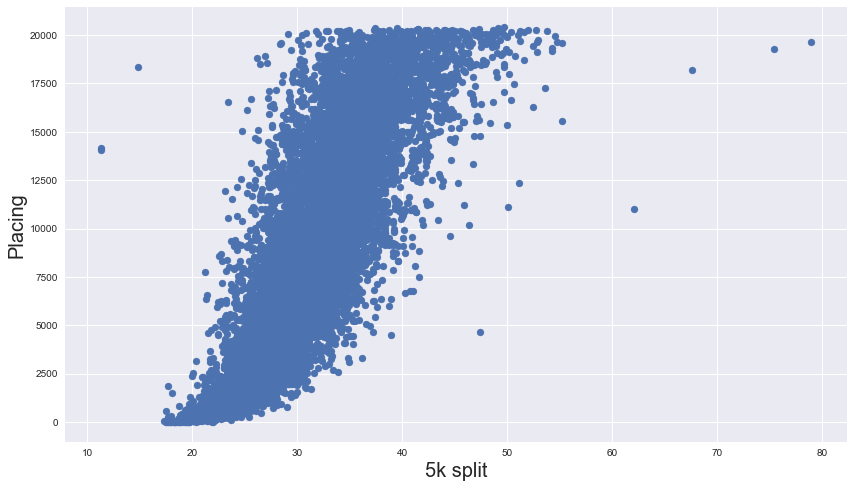

In [30]:
fig = plt.figure(figsize=(14, 8))

plt.scatter(results_2016['5k_split'], results_2016['place'])
plt.xlabel('5k split', fontsize=20)
plt.ylabel('Placing', fontsize=20)

In [31]:
df = results_2017

df['5k_to_10k_diff_ratio'] = (df['10k_speed'] - df['5k_speed']) / np.square(df['final_avg_speed'])
df['10k_to_15k_diff_ratio'] = (df['15k_speed'] - df['10k_speed']) / np.square(df['final_avg_speed'] )
df['15k_to_20k_diff_ratio'] = (df['20k_speed'] - df['15k_speed']) / np.square(df['final_avg_speed'] )
df['20k_to_25k_diff_ratio'] = (df['25k_speed'] - df['20k_speed']) / np.square(df['final_avg_speed'])
df['25k_to_30k_diff_ratio'] = (df['30k_speed'] - df['25k_speed']) / np.square(df['final_avg_speed'] )
df['30k_to_35k_diff_ratio'] = (df['35k_speed'] - df['30k_speed']) / np.square(df['final_avg_speed'] )
df['35k_to_40k_diff_ratio'] = (df['40k_speed'] - df['35k_speed']) / np.square(df['final_avg_speed'] )

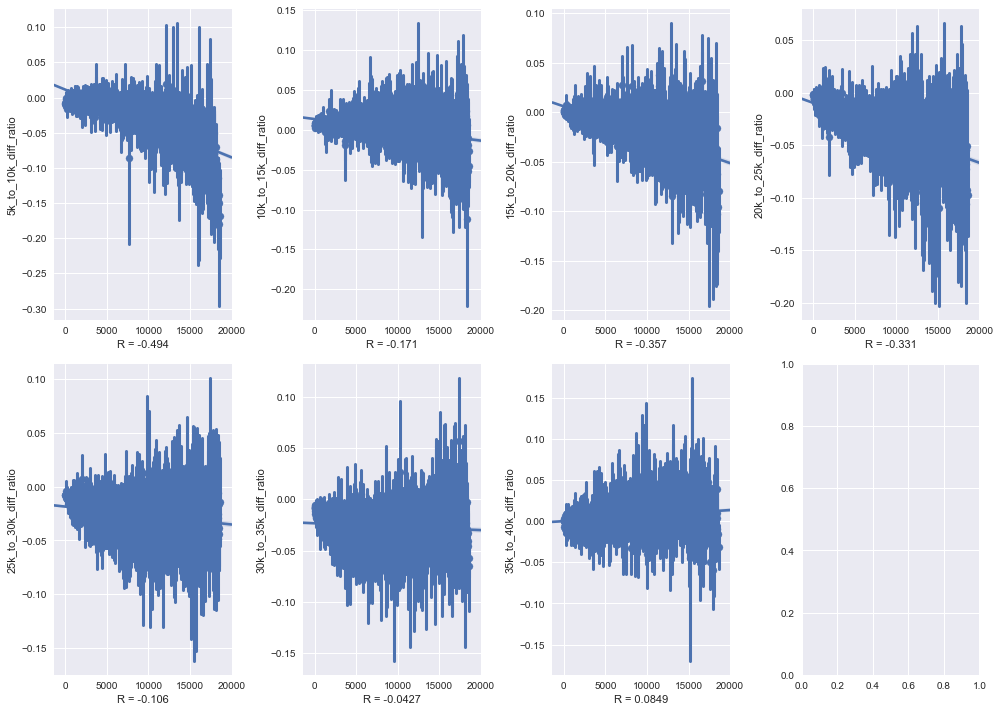

In [38]:
speed_cols = ['5k_to_10k_diff_ratio', '10k_to_15k_diff_ratio', '15k_to_20k_diff_ratio', '20k_to_25k_diff_ratio', \
              '25k_to_30k_diff_ratio', '30k_to_35k_diff_ratio', '35k_to_40k_diff_ratio']

nrows=2
ncols=4
figsize=(14,10)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

i = 1

for col in speed_cols:
    ax = plt.subplot(nrows, ncols, i)
    sns.regplot(x='place', y=col, data=results_2017, x_bins=1000)
    #plt.xlabel(col, fontsize=16)
    #plt.ylabel('Placing', fontsize=16)
    i += 1
    ax.set(xlabel="R = {:.3}".format(results_2017[['place', col]].corr().iloc[0][1]))
    
fig.tight_layout()
plt.show()

In [6]:
speed_cols = ['5k_speed', '10k_speed', '15k_speed', '20k_speed', '25k_speed', '30k_speed', '35k_speed', '40k_speed']

In [8]:
# Raw L2 computation (no ratio)
L2_vals = results_2017['5k_split']*0 # Quickly create a series filled with zeros of the correct length

for col in speed_cols:
    L2_vals += np.square(results_2017[col] - results_2017['final_avg_speed'])
    
results_2017['L2_speed_diff'] = L2_vals

# L2 computation using a ratio
L2_vals_ratio = results_2017['5k_split']*0 # Quickly create a series filled with zeros of the correct length

for col in speed_cols:
    L2_vals_ratio += np.square((results_2017[col] / results_2017['final_avg_speed']) - 1)
    
results_2017['L2_speed_diff_ratio'] = L2_vals_ratio



In [21]:
# L2 computation with ratio and divided again by average speed
L2_vals_ratio = results_2017['5k_split']*0 # Quickly create a series filled with zeros of the correct length

for col in speed_cols:
    L2_vals_ratio += np.square((results_2017[col] / results_2017['final_avg_speed']) - 1) / results_2017['final_avg_speed']
    
results_2017['L2_speed_diff_ratio_2'] = L2_vals_ratio

In [27]:
# Once more with another division by average speed?
L2_vals_ratio = results_2017['5k_split']*0 # Quickly create a series filled with zeros of the correct length

for col in speed_cols:
    L2_vals_ratio += np.square((results_2017[col] / results_2017['final_avg_speed']) - 1) / np.square(results_2017['final_avg_speed'])
    
results_2017['L2_speed_diff_ratio_3'] = L2_vals_ratio

In [28]:
results_2017[['place', 'L2_speed_diff_ratio_3']].corr()

,place,L2_speed_diff_ratio_3
place,1.000000,0.511644
L2_speed_diff_ratio_3,0.511644,1.000000


In [18]:
results_2017[['place', 'L2_speed_diff']].corr()

,place,L2_speed_diff
place,1.000000,0.092567
L2_speed_diff,0.092567,1.000000


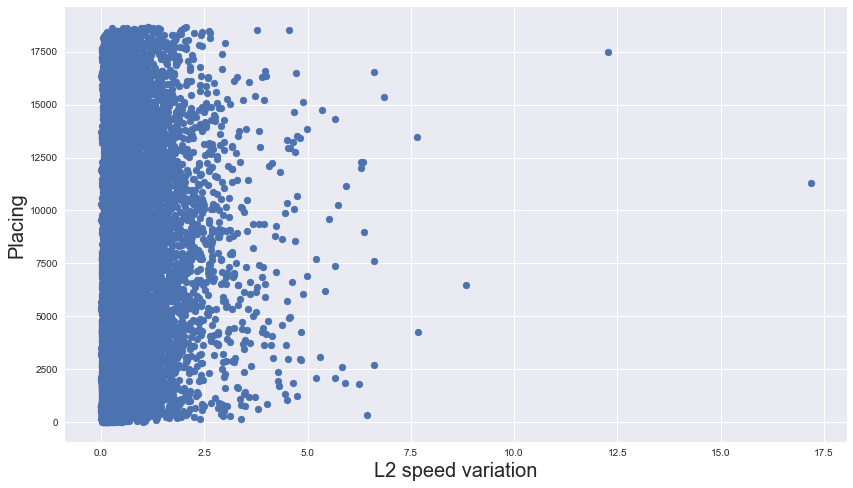

In [19]:
fig = plt.figure(figsize=(14, 8))

plt.scatter(results_2017['L2_speed_diff'], results_2017['place'])
plt.xlabel('L2 speed variation', fontsize=20)
plt.ylabel('Placing', fontsize=20)

In [20]:
results_2017[['place', 'L2_speed_diff_ratio']].corr()

,place,L2_speed_diff_ratio
place,1.00000,0.38488
L2_speed_diff_ratio,0.38488,1.00000


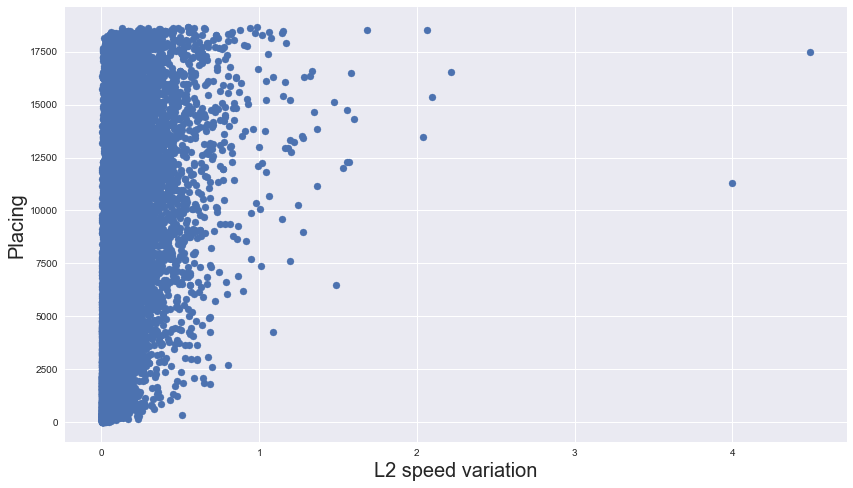

In [12]:
fig = plt.figure(figsize=(14, 8))

plt.scatter(results_2017['L2_speed_diff_ratio'], results_2017['place'])
plt.xlabel('L2 speed variation', fontsize=20)
plt.ylabel('Placing', fontsize=20)

In [24]:
results_2017[['place', 'L2_speed_diff']].corr()

,place,L2_speed_diff
place,1.000000,0.092567
L2_speed_diff,0.092567,1.000000


In [25]:
results_2017[['place', 'L2_speed_diff_ratio']].corr()

,place,L2_speed_diff_ratio
place,1.00000,0.38488
L2_speed_diff_ratio,0.38488,1.00000


In [26]:
results_2017[['place', 'L2_speed_diff_ratio_2']].corr()

,place,L2_speed_diff_ratio_2
place,1.000000,0.467399
L2_speed_diff_ratio_2,0.467399,1.000000


In [40]:
top_5_pct = results_2017['place'].quantile(.05)
top_5_pct_df= results_2017[results_2017['place'] <= top_5_pct]

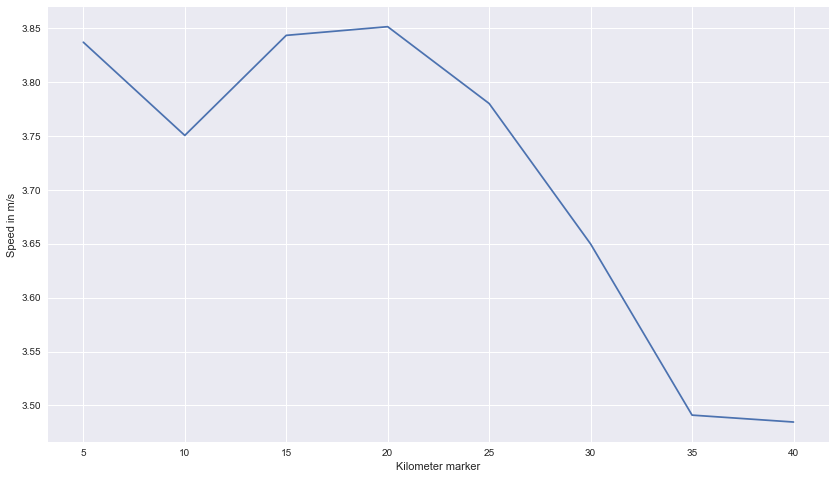

In [53]:
speed_cols = ['5k_speed', '10k_speed', '15k_speed', '20k_speed', '25k_speed', '30k_speed', '35k_speed', '40k_speed']

avg_paces = []
for col in speed_cols:
    avg_paces.append(top_5_pct_df[col].mean())
    
fig = plt.figure(figsize=(14, 8))
plt.plot(np.arange(5,45,5),avg_paces)
plt.xlabel('Kilometer marker')
plt.ylabel('Speed in m/s')